In [32]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

In [33]:
def get_stock_data(symbol, start_date, end_date, interval='1m'):
    """
    Fetch stock data using specified interval.
    - '1d' for daily data (long-term prediction).
    - '60m' for 60-minute intraday data (short-term prediction).
    """
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title(f'{symbol} Close Price - Interval: {interval}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return stock_data.index, stock_data['Adj Close'].values.reshape(-1, 1)


In [34]:
# Function to create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [35]:
# Function to plot actual vs. predicted values
def plot_predictions_with_dates(dates, actual, predicted, title):
    plt.figure(figsize=(10, 6))
    
    # Ensure 'dates' has the correct length and frequency for your predictions
    if len(dates) > len(actual):  # Adjust if 'dates' array is longer than actual predictions
        dates = dates[:len(actual)]
    
    plt.plot(dates, actual.flatten(), label='Actual')  # Use actual dates from the test data
    plt.plot(dates, predicted.flatten(), label='Predicted')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


In [37]:
# Define stock symbols and date range
symbols = ['AAPL', 'GOOGL', 'MSFT']

# Define LSTM parameters
sequence_length_long = 10  # For long-term predictions (e.g., daily data)
sequence_length_short = 3  # For short-term predictions (e.g., 60-minute intervals)


In [38]:
def evaluate_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")


[*********************100%%**********************]  1 of 1 completed

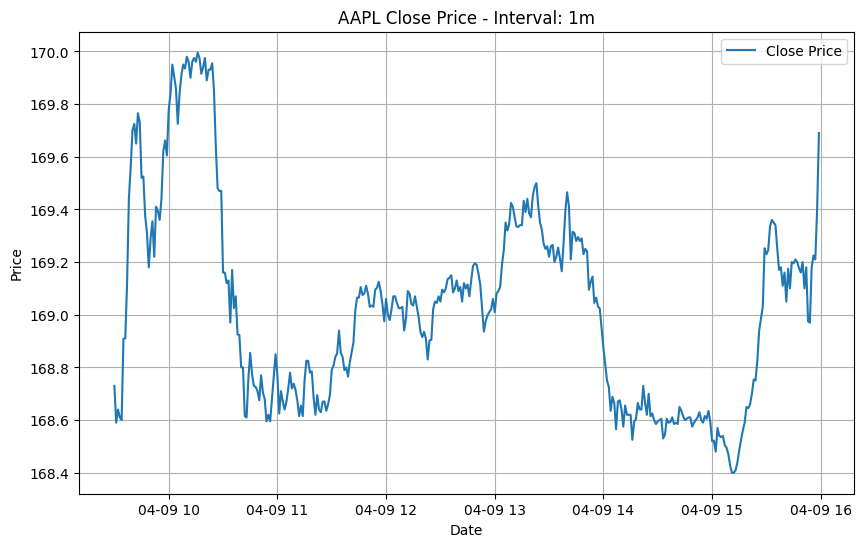

Epoch 1/100
9/9 - 3s - loss: 0.2174 - val_loss: 0.0042 - 3s/epoch - 295ms/step
Epoch 2/100
9/9 - 0s - loss: 0.1420 - val_loss: 0.0022 - 48ms/epoch - 5ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0617 - val_loss: 0.0326 - 44ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0262 - val_loss: 0.0848 - 46ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 0.0293 - val_loss: 0.0534 - 45ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 0.0229 - val_loss: 0.0364 - 44ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 0.0188 - val_loss: 0.0351 - 47ms/epoch - 5ms/step
3/3 [==============================] - 0s 2ms/step


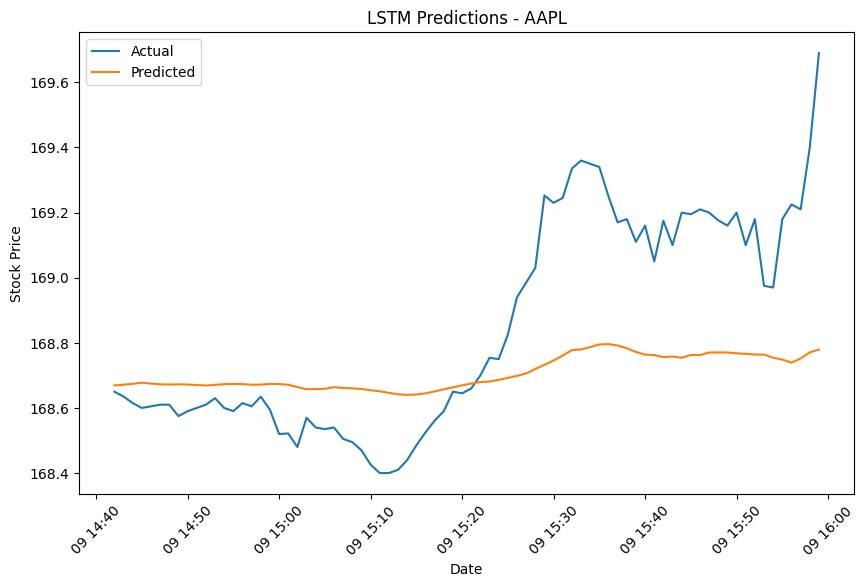

Evaluating LSTM Performance for AAPL
Mean Squared Error (MSE): 0.09666557356607743
Root Mean Squared Error (RMSE): 0.3109108772077256
Mean Absolute Error (MAE): 0.24576255602714342
R^2 Score: 0.0929476671290218


[*********************100%%**********************]  1 of 1 completed


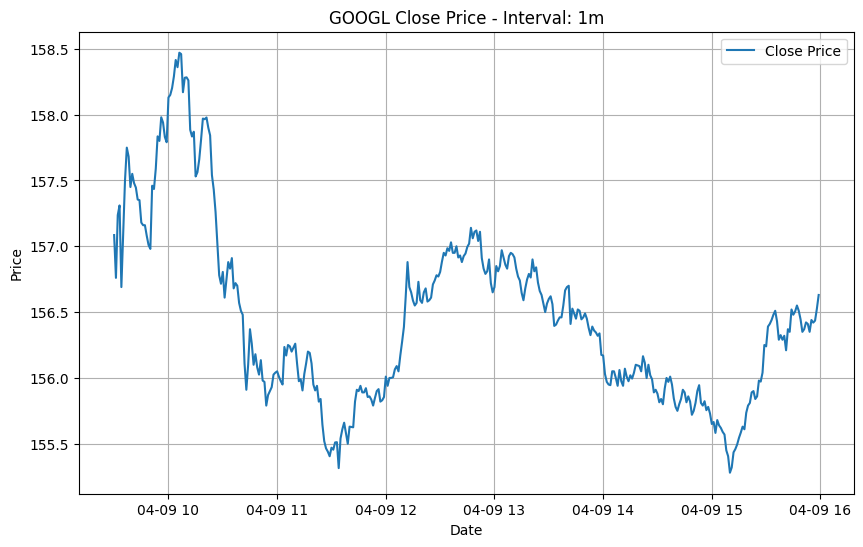

Epoch 1/100
9/9 - 3s - loss: 0.1847 - val_loss: 0.0161 - 3s/epoch - 288ms/step
Epoch 2/100
9/9 - 0s - loss: 0.0946 - val_loss: 8.9837e-04 - 45ms/epoch - 5ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0276 - val_loss: 0.0298 - 44ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0243 - val_loss: 0.0347 - 45ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 0.0171 - val_loss: 0.0117 - 45ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 0.0138 - val_loss: 0.0083 - 45ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 0.0109 - val_loss: 0.0097 - 46ms/epoch - 5ms/step
3/3 [==============================] - 0s 2ms/step


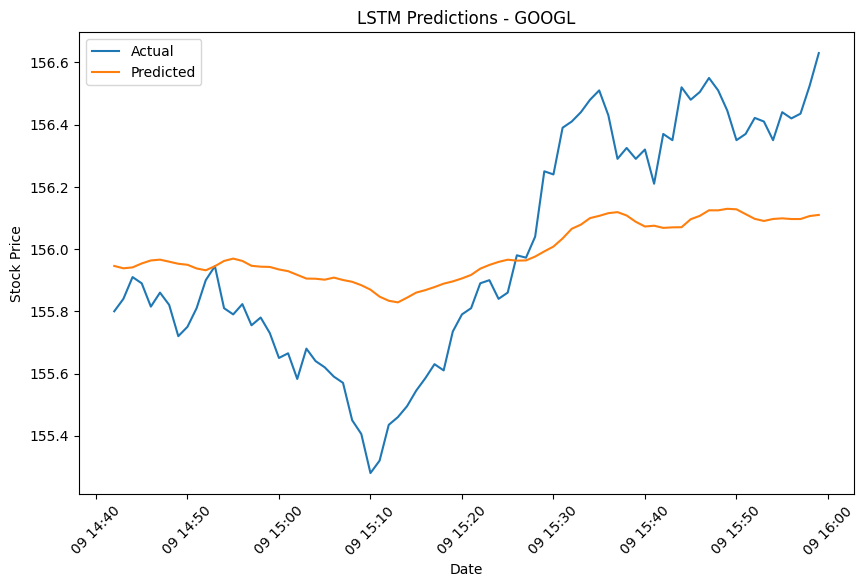

Evaluating LSTM Performance for GOOGL
Mean Squared Error (MSE): 0.08082102023614332
Root Mean Squared Error (RMSE): 0.28429038013296076
Mean Absolute Error (MAE): 0.2515716552734375
R^2 Score: 0.40782792469397766


[*********************100%%**********************]  1 of 1 completed


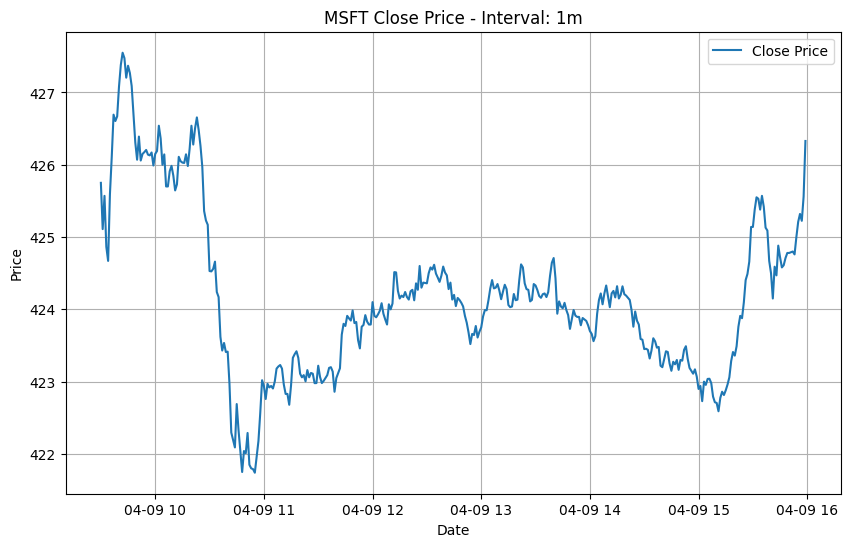

Epoch 1/100
9/9 - 3s - loss: 0.2026 - val_loss: 0.0814 - 3s/epoch - 288ms/step
Epoch 2/100
9/9 - 0s - loss: 0.1330 - val_loss: 0.0333 - 45ms/epoch - 5ms/step
Epoch 3/100
9/9 - 0s - loss: 0.0622 - val_loss: 0.0026 - 46ms/epoch - 5ms/step
Epoch 4/100
9/9 - 0s - loss: 0.0241 - val_loss: 0.0225 - 45ms/epoch - 5ms/step
Epoch 5/100
9/9 - 0s - loss: 0.0259 - val_loss: 0.0107 - 44ms/epoch - 5ms/step
Epoch 6/100
9/9 - 0s - loss: 0.0201 - val_loss: 0.0030 - 44ms/epoch - 5ms/step
Epoch 7/100
9/9 - 0s - loss: 0.0178 - val_loss: 0.0040 - 45ms/epoch - 5ms/step
Epoch 8/100
9/9 - 0s - loss: 0.0144 - val_loss: 0.0054 - 62ms/epoch - 7ms/step
3/3 [==============================] - 0s 1ms/step


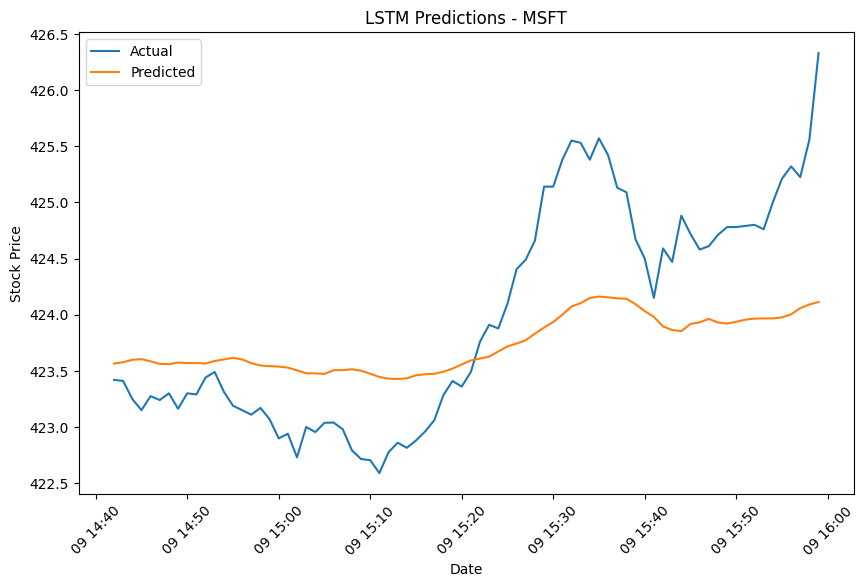

Evaluating LSTM Performance for MSFT
Mean Squared Error (MSE): 0.6140441117235125
Root Mean Squared Error (RMSE): 0.7836096679619978
Mean Absolute Error (MAE): 0.666881854717551
R^2 Score: 0.3528844086487545


In [40]:
for symbol in symbols:
    # Example for long-term prediction
    dates, data_short = get_stock_data(symbol, start_date='2024-04-09', end_date='2024-04-10', interval='1m')
    # For short-term prediction, adjust the start_date and end_date to a narrower range and interval to '60m'
    # dates, data_short = get_stock_data(symbol, start_date='2023-01-01', end_date='2023-01-31', interval='60m')
    
    # Choose which dataset and sequence length to use based on your prediction goal
    data = data_short  # or data_short for short-term
    sequence_length = sequence_length_short  # or sequence_length_short for short-term

    # Normalize the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Create sequences and targets
    X, y = create_sequences(data_scaled, sequence_length)
    
    # Split the data into training and testing sets
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Build the LSTM model with dropout for regularization
    lstm_model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
        Dropout(0.2),  # Add dropout with a 20% rate
        LSTM(units=50),
        Dropout(0.2),  # Another dropout layer for additional regularization
        Dense(units=1)
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Adjusted early stopping callback to be more sensitive to overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the LSTM model with the updated early stopping callback
    lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping])
    
    # Predict on the test set with the LSTM model
    predictions_scaled_lstm = lstm_model.predict(X_test)
    predictions_lstm = scaler.inverse_transform(predictions_scaled_lstm)
    y_test_original = scaler.inverse_transform(y_test)
    # y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))  # Ensure correct shape
    
    # Plot actual vs. predicted values for LSTM
    # adjusted_dates = dates[split_index + sequence_length:split_index + sequence_length + len(y_test_original)]
    plot_predictions_with_dates(dates[split_index + sequence_length:], y_test_original, predictions_lstm, f'LSTM Predictions - {symbol}')
    
    # Evaluate LSTM model performance with additional metrics
    print(f'Evaluating LSTM Performance for {symbol}')
    evaluate_model_performance(y_test_original, predictions_lstm)